In [1]:
cd ..

/Users/hao/workspace/hpi_de/4th_Semester/Online Learning/rl-4-self-repair


In [9]:
import os
import operator
import logging
import time
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from algorithm_analysis.a2c import Model, A2CAgent
from envs.broken_components import BrokenComponentsEnv
from algorithm_analysis.benchmark import BROKEN_COMPONENTS_LIST
from algorithm_analysis.plotting import plot_episode_length_over_time_A2C, plot_episode_reward_over_time_A2C
from algorithm_analysis.metrics import dump_metric, load_metric

In [3]:
for i, bc in enumerate(BROKEN_COMPONENTS_LIST):
    print(i, len(bc))

0 3
1 5
2 7
3 9
4 11
5 13
6 15
7 17
8 19
9 21
10 23
11 25
12 27
13 29


In [4]:
run = 0

In [ ]:
learning_rates = [7e-3, 7e-3, 7e-3, 7e-3, 7e-3, 5e-3, 5e-3, 5e-3, 3e-3, 3e-3, 3e-3, 3e-3, 3e-3, 3e-3]
entropy_coefficients = [0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
value_coefficients = [0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
episodes = 500
units = 128
run += 1
dir_path = './algorithm_analysis/a2c_metrics/run{}_chosen_params_{}'.format(run, units)

In [ ]:
for i, broken_components in enumerate(tqdm(BROKEN_COMPONENTS_LIST, desc='Broken Components Loop: ')):
    env = BrokenComponentsEnv(broken_components, state_as_vec=True)
    
    model = Model(num_actions=env.action_space.n, units=units)
    agent = A2CAgent(model, learning_rate=learning_rates[i], discount_rate=0.99, value_coefficient=value_coefficients[i], entropy_coefficient=entropy_coefficients[i])
    
    metric = agent.train_by_episodes(env, episodes=episodes)
    filename = f'a2c_metric_bc-{len(broken_components)}_lr-{metric.learning_rate}_dr-{metric.discount_rate}_vc-{metric.value_coefficient}_ec-{metric.entropy_coefficient}_ep-{metric.episodes}.pickle'
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    dump_metric(metric, dir_path, filename)
    print('Dump metric.')

## Analysis

### load metrics

In [13]:
dir_path = './algorithm_analysis/a2c_metrics/run4_chosen_params_128'

metrics = []
for dirpath, dirnames, filenames in os.walk(dir_path):
    for filename in filenames:
        print(filename)
        metric = load_metric(dirpath, filename)
        metrics.append(metric)
        
metrics.sort(key=operator.attrgetter('num_broken_components'))

a2c_metric_bc-17_lr-0.005_dr-0.99_vc-0.7_ec-0.1_ep-500.pickle
a2c_metric_bc-5_lr-0.007_dr-0.99_vc-0.5_ec-0.0001_ep-500.pickle
a2c_metric_bc-7_lr-0.007_dr-0.99_vc-0.5_ec-0.001_ep-500.pickle
a2c_metric_bc-15_lr-0.005_dr-0.99_vc-0.7_ec-0.1_ep-500.pickle
a2c_metric_bc-13_lr-0.005_dr-0.99_vc-0.7_ec-0.01_ep-500.pickle
a2c_metric_bc-3_lr-0.007_dr-0.99_vc-0.5_ec-0.0001_ep-500.pickle
a2c_metric_bc-9_lr-0.007_dr-0.99_vc-0.5_ec-0.001_ep-500.pickle
a2c_metric_bc-11_lr-0.007_dr-0.99_vc-0.5_ec-0.01_ep-500.pickle
a2c_metric_bc-19_lr-0.003_dr-0.99_vc-0.7_ec-0.1_ep-500.pickle


### Plot

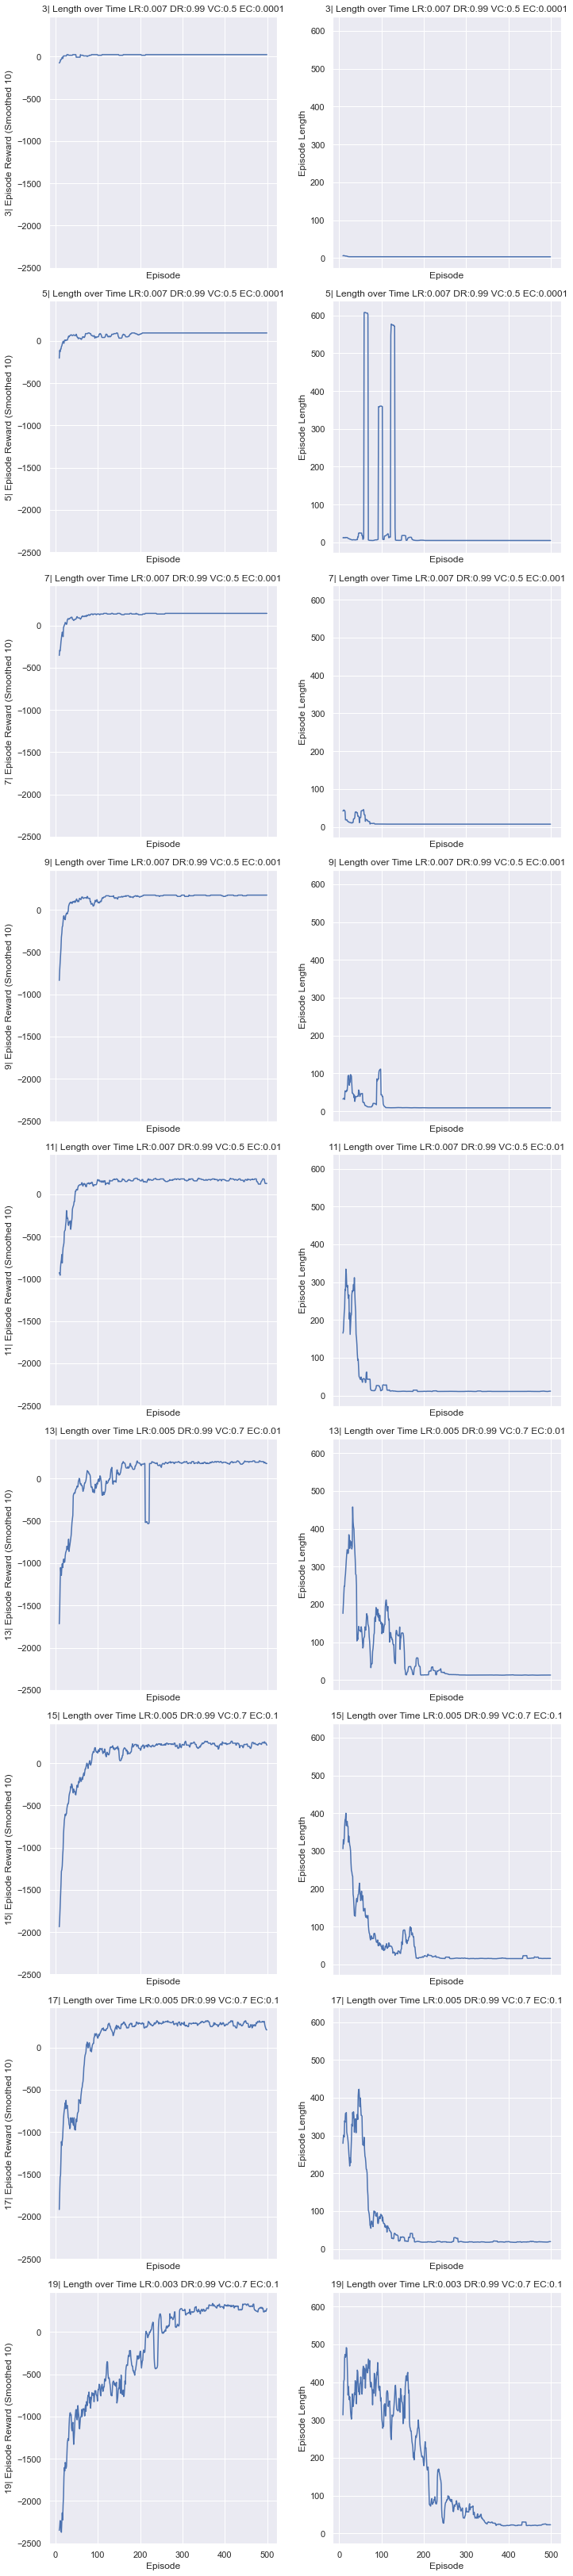

In [14]:
total_runs = len(metrics)
num_plots = 2
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, metric in enumerate(metrics):
    plot_episode_reward_over_time_A2C(axs[i, 0], metric)
    plot_episode_length_over_time_A2C(axs[i, 1], metric)